In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.linear_model import LogisticRegression
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import cProfile

In [2]:
# Seleccionar solo las variables numéricas relevantes
datos = pd.read_csv("train.csv", encoding="latin1")
numericas = datos.select_dtypes(include='number')
numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

numericas = numericas.dropna()

In [3]:
# Crear variable respuesta que clasifica las casas en Económicas, Intermedias o Caras
terciles = np.percentile(numericas["SalePrice"], [33.33, 66.67])
limite_economicas = terciles[0]
limite_caras = terciles[1]
numericas["Clase"] = pd.cut(numericas["SalePrice"], bins=[0, limite_economicas, limite_caras, float("inf")], labels=["Económicas", "Intermedias", "Caras"])

In [4]:
dummies = pd.get_dummies(numericas['Clase'])
dummies.head()

,Económicas,Intermedias,Caras
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [5]:
datos = pd.concat([numericas,dummies], axis=1)
datos.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,TotRmsAbvGrd,GarageCars,GarageArea,PoolArea,MiscVal,SalePrice,Clase,Económicas,Intermedias,Caras
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,8,2,548,0,0,208500,Caras,0,0,1
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,6,2,460,0,0,181500,Intermedias,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,6,2,608,0,0,223500,Caras,0,0,1
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,7,3,642,0,0,140000,Intermedias,0,1,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,9,3,836,0,0,250000,Caras,0,0,1


In [6]:
economica = datos.pop("Económicas") 
intermedias = datos.pop("Intermedias")
caras = datos.pop("Caras")
datos.pop("Clase")

0             Caras
1       Intermedias
2             Caras
3       Intermedias
4             Caras
           ...     
1455    Intermedias
1456          Caras
1457          Caras
1458    Intermedias
1459    Intermedias
Name: Clase, Length: 1195, dtype: category
Categories (3, object): ['Económicas' < 'Intermedias' < 'Caras']

In [7]:
X = datos
y = caras

random.seed(42)

In [8]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [9]:
logReg = LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [10]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar si es cara o no\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('Recall score:', recall)
print('F1 score: ', f1)

Matriz de confusión para detectar si es cara o no
 [[154   2]
 [  1  82]]
Accuracy:  0.9874476987447699
Precision:  0.9874476987447699
Recall score: 0.9874476987447699
F1 score:  0.9874476987447699


In [11]:
k_folds = KFold(n_splits = 5, shuffle=True, random_state=42)

scores = cross_val_score(logReg, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.9874477 0.9958159 0.9916318 0.9958159 0.9916318]
Average CV Score:  0.992468619246862
Number of CV Scores used in Average:  5


# Inciso 5. Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para clasificar.

In [12]:
# Creamos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

In [13]:
# Imprimimos la matriz de confusión
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[154   2]
 [  1  82]]


In [14]:
# Calculamos algunas métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [15]:
# Imprimimos las métricas de evaluación
print("Exactitud: {:.2f}".format(accuracy))
print("Precisión: {:.2f}".format(precision))
print("Sensibilidad: {:.2f}".format(recall))
print("Puntuación F1: {:.2f}".format(f1))

Exactitud: 0.99
Precisión: 0.99
Sensibilidad: 0.99
Puntuación F1: 0.99


# Inciso 6. Explique si hay sobreajuste (overfitting) o no (recuerde usar para esto los errores del conjunto de prueba y de entrenamiento). 

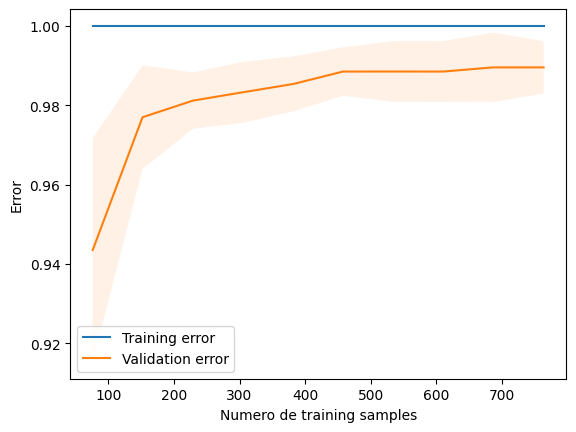

In [20]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=logReg, 
    X=X_train, 
    y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5,
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Validation error')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Numero de training samples')
plt.ylabel('Error')
plt.legend()
plt.show()

In [21]:
print("El modelo está generalizando bien y no hay un overfitting significativo. \
Pero aún así, es importante continuar evaluando y ajustando el modelo para asegurarse de que está \
optimizado y proporciona el mejor rendimiento posible.")

El modelo está generalizando bien y no hay un overfitting significativo. Pero aún así, es importante continuar evaluando y ajustando el modelo para asegurarse de que está optimizado y proporciona el mejor rendimiento posible.


# Inciso 7 & 8. Haga otros dos modelos cambiando las variables predictoras de acuerdo con la significación de los coeficientes en el primer modelo. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión. Usar cProfiler para medir tiempo y memoria.

In [40]:
# Stepwise regression
def forward_stepwise(X, y, initial_list=[], threshold_in=0.01, verbose=True):
    included = list(initial_list)
    excluded = [col for col in X.columns if col not in included]
    while True:
        changed = False
        excluded_dict = {}
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [new_column]])).fit()
            p_value = model.pvalues[new_column]
            excluded_dict[new_column] = p_value
        best_column, best_pvalue = min(excluded_dict.items(), key=lambda x: x[1])
        if best_pvalue < threshold_in:
            included.append(best_column)
            excluded.remove(best_column)
            if verbose:
                print("Add {:30} with p-value {:.6}".format(best_column, best_pvalue))
            changed = True
        if not changed:
            break
    return included

In [41]:
selected_columns = forward_stepwise(X, y)

Add SalePrice                      with p-value 1.06628e-231
Add OverallQual                    with p-value 2.59376e-12
Add YearRemodAdd                   with p-value 7.30075e-07
Add OverallCond                    with p-value 1.41202e-07
Add FullBath                       with p-value 0.00174004
Add MasVnrArea                     with p-value 0.00257718
Add PoolArea                       with p-value 0.00571085
Add GarageArea                     with p-value 0.00650622
Add GarageCars                     with p-value 0.00623016


In [43]:
print("Se seleccionaron las columnas anteriores porque tienen un valor P certero y poco probable de \
ser al azar, y así poder tener mejores predicciones.")

Se seleccionaron las columnas anteriores porque tienen un valor P certero y poco probable de ser al azar, y así poder tener mejores predicciones.


In [54]:
def entrenar_arbol(X_train, y_train, X_test, y_test):
    # Crear modelo de árbol de clasificación
    arbol = DecisionTreeClassifier(random_state=0)
    # Entrenar modelo
    arbol.fit(X_train, y_train)
    # Predecir valores para conjunto de prueba
    y_pred = arbol.predict(X_test)
    # Evaluar precisión del modelo
    precision = accuracy_score(y_test, y_pred)
    # Predecir etiquetas para conjunto de prueba
    y_pred = arbol.predict(X_test)
    # Calcular precisión del modelo
    precision = accuracy_score(y_test, y_pred)
    # Creamos la matriz de confusion
    cm = confusion_matrix(y_test, y_pred)
    # Calculamos algunas métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Imprimimos las métricas de evaluación
    print("Exactitud: {:.2f}".format(accuracy))
    print("Precisión: {:.2f}".format(precision))
    print("Sensibilidad: {:.2f}".format(recall))
    print("Puntuación F1: {:.2f}".format(f1))

In [55]:
entrenar_arbol(X_train, y_train, X_test, y_test)

Exactitud: 1.00
Precisión: 1.00
Sensibilidad: 1.00
Puntuación F1: 1.00


In [56]:
cProfile.run('entrenar_arbol(X_train, y_train, X_test, y_test)')

Exactitud: 1.00
Precisión: 1.00
Sensibilidad: 1.00
Puntuación F1: 1.00
         19460 function calls (19199 primitive calls) in 0.014 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.014    0.014 3843723223.py:1(entrenar_arbol)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(all)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(amax)
       17    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(any)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(argmax)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(atleast_1d)
       12    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(average)
        9    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(bincount)
       11    0.000    0.000    0.000    0.000 <__array_

In [36]:
print("El modelo no cometió ningún error al predecir la clase \
correcta para todas las muestras del conjunto de prueba.")

El modelo no cometió ningún error al predecir la clase correcta para todas las muestras del conjunto de prueba.


In [60]:
def random_forest_model(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=None):
    # Crear el modelo de Random Forest con los parámetros deseados
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    # Entrenar el modelo con los datos de entrenamiento
    rf.fit(X_train, y_train)   
    # Predecir las clases para los datos de prueba
    y_pred = rf.predict(X_test)
    # Calcular precisión del modelo
    precision = accuracy_score(y_test, y_pred)
    # Creamos la matriz de confusion
    cm = confusion_matrix(y_test, y_pred)
    # Calculamos algunas métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Imprimimos las métricas de evaluación
    print("Exactitud: {:.2f}".format(accuracy))
    print("Precisión: {:.2f}".format(precision))
    print("Sensibilidad: {:.2f}".format(recall))
    print("Puntuación F1: {:.2f}".format(f1))

In [61]:
random_forest_model(X_train, y_train, X_test, y_test)

Exactitud: 1.00
Precisión: 1.00
Sensibilidad: 1.00
Puntuación F1: 1.00


In [62]:
print("El modelo no cometió ningún error al predecir la clase \
correcta para todas las muestras del conjunto de prueba.")

El modelo no cometió ningún error al predecir la clase correcta para todas las muestras del conjunto de prueba.


In [63]:
cProfile.run('random_forest_model(X_train, y_train, X_test, y_test)')

Exactitud: 1.00
Precisión: 1.00
Sensibilidad: 1.00
Puntuación F1: 1.00
         290525 function calls (287609 primitive calls) in 0.237 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.237    0.237 3932651776.py:1(random_forest_model)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(all)
      100    0.000    0.000    0.001    0.000 <__array_function__ internals>:177(amax)
      116    0.000    0.000    0.001    0.000 <__array_function__ internals>:177(any)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(argmax)
      102    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(atleast_1d)
       11    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(average)
      109    0.000    0.000    0.001    0.000 <__array_function__ internals>:177(bincount)
      209    0.000    0.000    0.001    0.000 <_